# Hist Quick Demo

My favorite demo notebook config setting:

In [1]:
%config InteractiveShell.ast_node_interactivity="last_expr_or_assign"

Let's import Hist:

In [2]:
from hist import Hist
import numpy as np

We can use the classic constructors from boost-histogram, but let's use the new QuickConstruct system instead:

In [3]:
h = Hist.new.Reg(100, -10, 10, name="x").Double()

Hist(Regular(100, -10, 10, name='x', label='x'), storage=Double())

Let's fill it with some data:

In [4]:
h.fill(np.random.normal(1, 3, 1_000_000))

Hist(Regular(100, -10, 10, name='x', label='x'), storage=Double()) # Sum: 998447.0 (1000000.0 with flow)

And you can keep filling:

In [5]:
h.fill(np.random.normal(-3, 1, 100_000))

Hist(Regular(100, -10, 10, name='x', label='x'), storage=Double()) # Sum: 1098447.0 (1100000.0 with flow)

You can plot (uses mplhep in the backend):

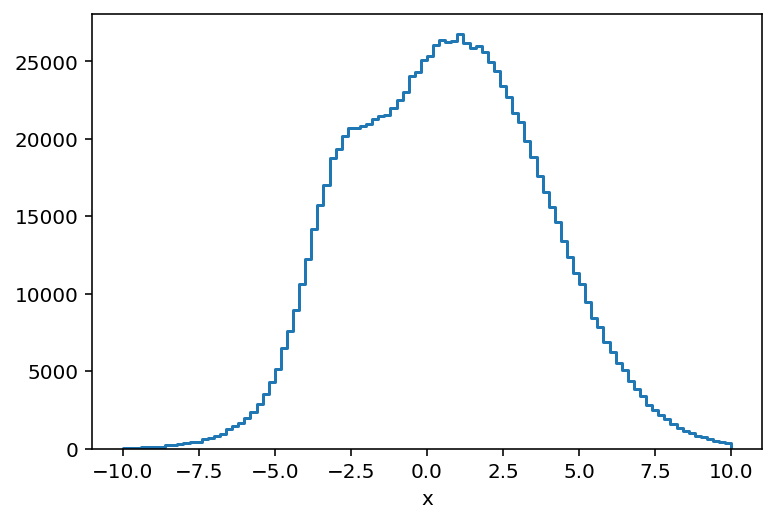

In [6]:
h.plot();

We also have direct access to histoprint:

In [7]:
h.show(columns=50)

-1.00e+01 _                             2.67e+04 ╷
-9.80e+00 _
-9.60e+00 _
-9.40e+00 _
-9.20e+00 _
-9.00e+00 _
-8.80e+00 _
-8.60e+00 _
-8.40e+00 _
-8.20e+00 _
-8.00e+00 _
-7.80e+00 _
-7.60e+00 _
-7.40e+00 _
-7.20e+00 _
-7.00e+00 _█
-6.80e+00 _█
-6.60e+00 _█
-6.40e+00 _█
-6.20e+00 _██
-6.00e+00 _██
-5.80e+00 _██
-5.60e+00 _███
-5.40e+00 _████
-5.20e+00 _█████
-5.00e+00 _██████
-4.80e+00 _███████
-4.60e+00 _█████████
-4.40e+00 _███████████
-4.20e+00 _█████████████
-4.00e+00 _███████████████
-3.80e+00 _█████████████████
-3.60e+00 _████████████████████
-3.40e+00 _██████████████████████
-3.20e+00 _████████████████████████
-3.00e+00 _███████████████████████████
-2.80e+00 _████████████████████████████
-2.60e+00 _█████████████████████████████
-2.40e+00 _██████████████████████████████
-2.20e+00 _██████████████████████████████
-2.00e+00 _██████████████████████████████
-1.80e+00 _██████████████████████████████
-1.60e+00 _███████████████████████████████
-1.40e+00 _███████████████████████████████
-

Let's try 2D:

In [8]:
h2 = Hist.new.Reg(100, -10, 10, name="x").Reg(100, -10, 10, name="y").Double()

Hist(
  Regular(100, -10, 10, name='x', label='x'),
  Regular(100, -10, 10, name='y', label='y'),
  storage=Double())

Can fill with two arrays:

In [9]:
h2.fill(x=np.random.normal(-3, 2, 500_000), y=np.random.normal(3, 1, 500_000))

Hist(
  Regular(100, -10, 10, name='x', label='x'),
  Regular(100, -10, 10, name='y', label='y'),
  storage=Double()) # Sum: 499889.0 (500000.0 with flow)

Or a 2D array (hey, let's do a multithreaded fill just for fun, too!):

In [10]:
h2.fill(*np.random.normal(0, 5, (2, 10_000_000)), threads=4)

Hist(
  Regular(100, -10, 10, name='x', label='x'),
  Regular(100, -10, 10, name='y', label='y'),
  storage=Double()) # Sum: 9610805.0 (10500000.0 with flow)

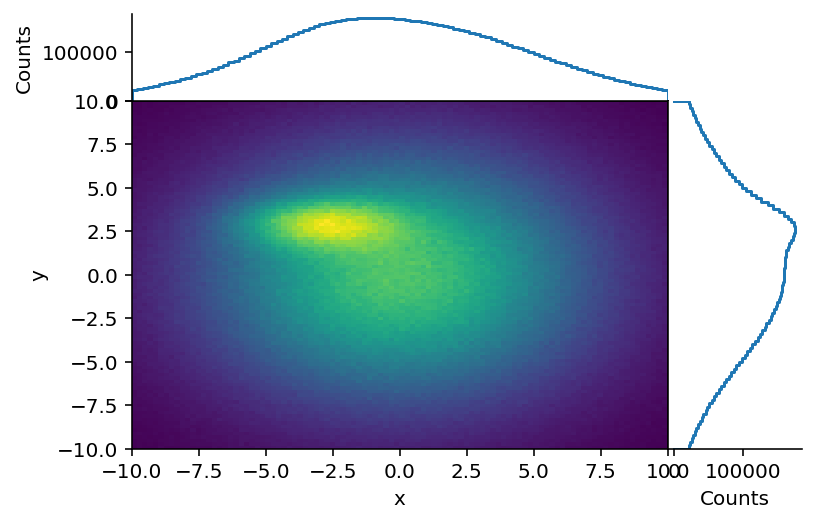

In [11]:
h2.plot2d_full();

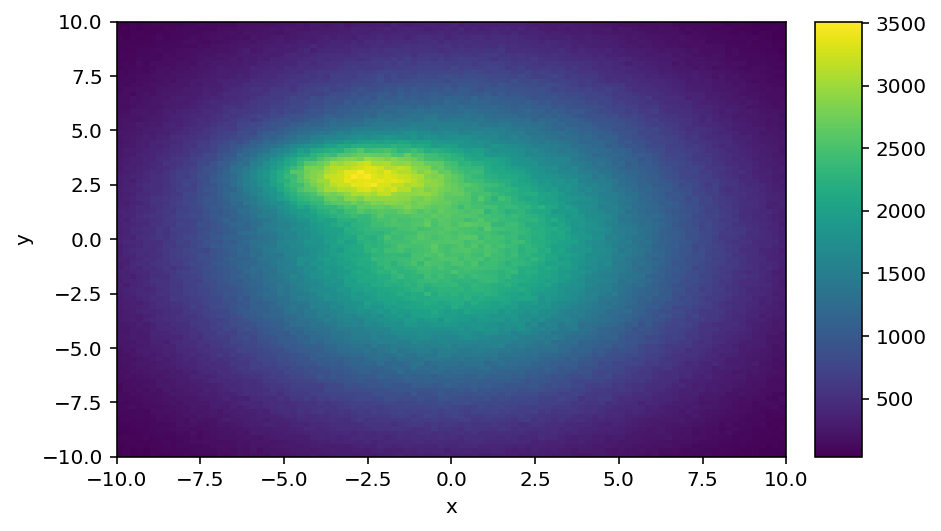

In [12]:
h2.plot();

In [13]:
h2.project("x")

Hist(Regular(100, -10, 10, name='x', label='x'), storage=Double()) # Sum: 10045484.0 (10500000.0 with flow)

In [14]:
h3 = (
    Hist.new.Reg(100, -10, 10, name="x")
    .Reg(50, -5, 5, name="y")
    .Reg(60, -3, 3, name="z")
    .Double()
)

Hist(
  Regular(100, -10, 10, name='x', label='x'),
  Regular(50, -5, 5, name='y', label='y'),
  Regular(60, -3, 3, name='z', label='z'),
  storage=Double())

In [15]:
h3.fill(*np.random.normal(0, 5, (3, 10_000_000)))

Hist(
  Regular(100, -10, 10, name='x', label='x'),
  Regular(50, -5, 5, name='y', label='y'),
  Regular(60, -3, 3, name='z', label='z'),
  storage=Double()) # Sum: 2941804.0 (10000000.0 with flow)

In [16]:
h3.project("x", "y")
# Can also write:
# h3[:, :, sum]
# h3[..., sum]

Hist(
  Regular(100, -10, 10, name='x', label='x'),
  Regular(50, -5, 5, name='y', label='y'),
  storage=Double()) # Sum: 6516322.0 (10000000.0 with flow)

We can slice and dice. Plain numbers refer to bins. Use a "j" suffix to refer to data coordinates. As above, `sum` will sum over an axis (optionally with end points). This system is called UHI+.

In [17]:
h3[-8j:8j, 10:50, sum]

Hist(
  Regular(80, -8, 8, name='x', label='x'),
  Regular(40, -3, 5, name='y', label='y'),
  storage=Double()) # Sum: 5049090.0 (10000000.0 with flow)

You can also use a dict; that includes using names too. (Note: this was independently developed but is nearly identical to XArray)

In [18]:
h3[{"x": slice(-8j, 8j), "y": slice(10, 50), "z": sum}]

Hist(
  Regular(80, -8, 8, name='x', label='x'),
  Regular(40, -3, 5, name='y', label='y'),
  storage=Double()) # Sum: 5049090.0 (10000000.0 with flow)

Everything integrates with histoprint, uproot4, and mplhep, too:

In [19]:
import mplhep

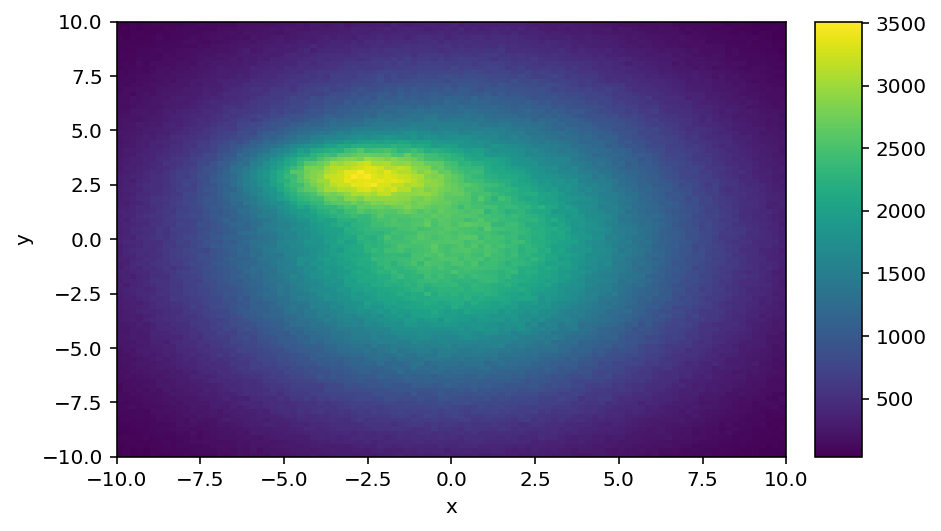

In [20]:
mplhep.hist2dplot(h2);